# Ans for Q.1 :-  My Views On Problem Statement 
## Problem Statement

#### Goal : To create a machine learning model to predict the salaries of newly hired employees at TechWorks Consulting. The model will take various features into account, such as education, experience, and location to ensure fair and competitive compensation.

#### Company Background: TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.

#### Data Description: The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This information will be used to train and test the predictive model.

#### Regression Task: The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees.

#### Role of Statistics: The role of statistics is to build and check the accuracy of the model.

#### Data Preprocessing: Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

### lets start with Project

# Ans for Q.2 :-  My Approach To The Problem for solution :-

## Name of Project :- Salary Prediction Model

### Data Understanding:
#### Begin by thoroughly understanding the provided dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.
### Data Preprocessing:
#### Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.

#### Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.

#### Convert Categorical Data: Transform categorical variables (e.g., "College" and "City") into numerical format.

#### Normalize Data: Normalize numerical features to bring them to a common scale to avoid any feature dominating the model.

#### Feature Selection: Use statistical techniques such as Lasso, Ridge, or correlation analysis to select the most relevant features for salary prediction.

#### Performing Exploratory Data Analysis (EDA)

### Model Selection: 

#### Choose different regression models (e.g., Linear Regression, Multi Linear Regression) to build and evaluate the predictive models.

#### Model Training and Evaluation: 

#### Split the dataset into training and testing sets to train the models and assess their performance.

#### Using appropriate evaluation metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) to measure the model's accuracy.

#### Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.

### Model Comparison: 

#### Compare the performance of different models and select the one with the best accuracy and generalization.

### Further Improvement:

#### Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.

## Now lets start with our Data Preprocessing part 

In [189]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
# Read a CSV file into a DataFrame

df=pd.read_csv("ML case Study.csv")
df1=pd.read_csv("Colleges.csv")
df2=pd.read_csv("cities.csv")

In [191]:
df.head()


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [192]:
df2.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [193]:
df1.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [194]:
# Extract data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataFrame
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for further analysis.

Tier1 = df1["Tier 1"].tolist()
Tier2 = df1["Tier 2"].tolist()
Tier3 = df1["Tier 3"].tolist()


In [195]:
# Assign tier values to colleges in the DataFrame based on their tier classification
# - If a college is in 'Tier1', set its value to 3
# - If a college is in 'Tier2', set its value to 2
# - If a college is in 'Tier3', set its value to 1
# Tier1 college get value of 3 and tier 3 of 1 because tier1 college has higher weightage then 2 and 3.

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_9396\3926275420.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["College"].replace(item,2,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_9396\3926275420.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [196]:
# Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame

metro = df2['Metrio City'].tolist()
non_metro_cities = df2['non-metro cities'].tolist()

In [197]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro

for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_9396\2011105457.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(item,0,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_9396\2011105457.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [198]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [199]:
# Converting Categorical column 'Role' into numerical

df = pd.get_dummies(df, columns=['Role'],drop_first=True).astype(int)

In [200]:
df.sample(5)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
247,1,1,63140,1,44,24,68416,0
1116,2,0,57597,2,52,41,68679,0
292,1,0,74198,1,57,25,99644,1
1464,1,0,56204,2,65,19,82667,1
41,1,0,66101,4,81,31,55470,0


In [201]:
# Checking missing values in data

df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

In [202]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int32
 1   City                 1589 non-null   int32
 2   Previous CTC         1589 non-null   int32
 3   Previous job change  1589 non-null   int32
 4   Graduation Marks     1589 non-null   int32
 5   EXP (Month)          1589 non-null   int32
 6   CTC                  1589 non-null   int32
 7   Role_Manager         1589 non-null   int32
dtypes: int32(8)
memory usage: 49.8 KB


In [203]:
# Statistical info about numerical data

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


## Detection of Outliers

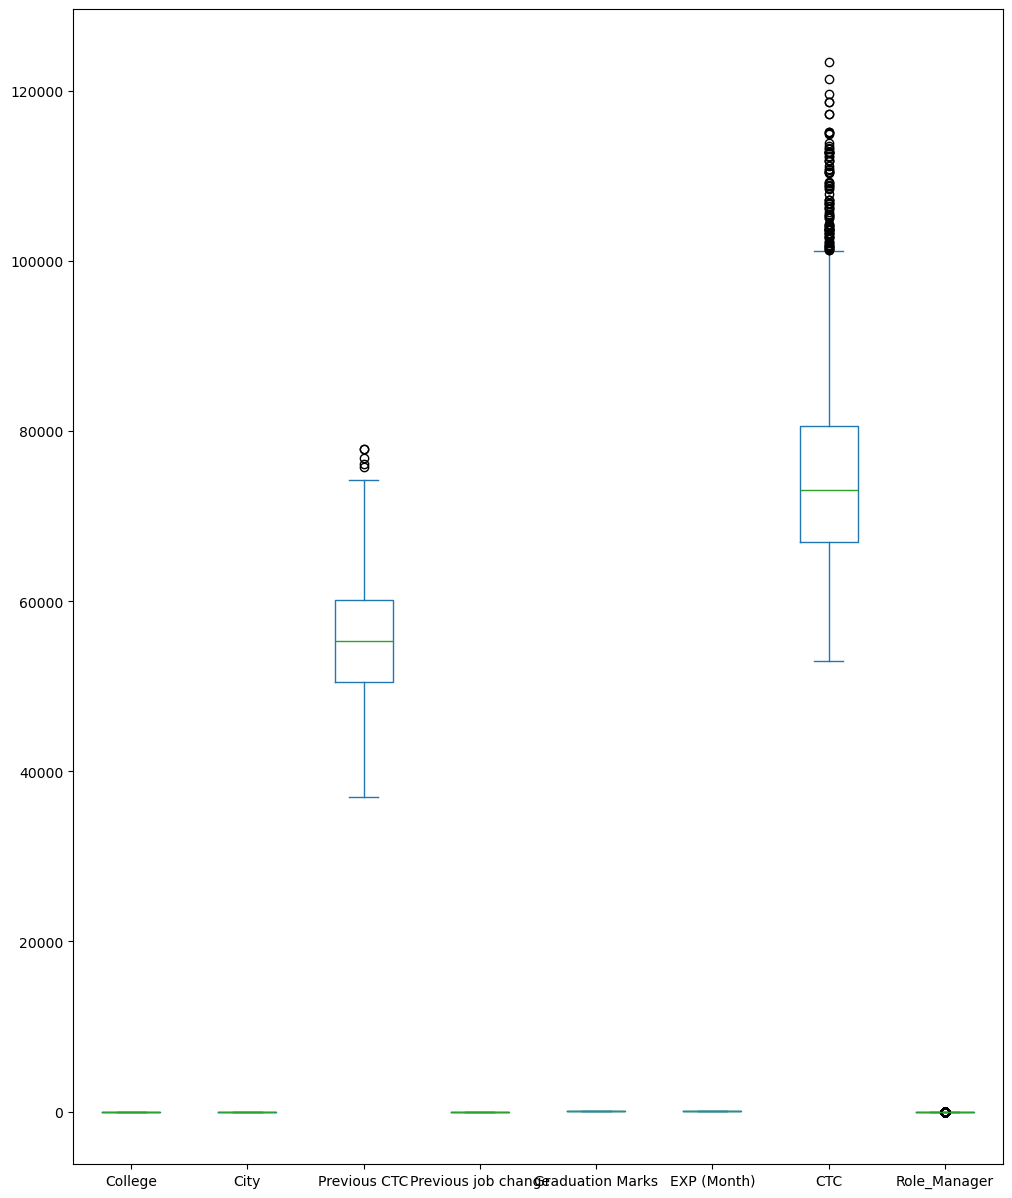

In [204]:
#finding outliers from all columns
df.plot(kind='box', figsize=(12, 15))
plt.show()

In [205]:
percent25 = df['CTC'].quantile(0.25)
percent75 = df['CTC'].quantile(0.75)
iqr = percent75-percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

newdf = df[df['CTC']<=upper_limit] 


## Here i have tried to remove outliers using IQR technique but later it comes in observation that it wont affecting that much thats why decided to keep the outliers

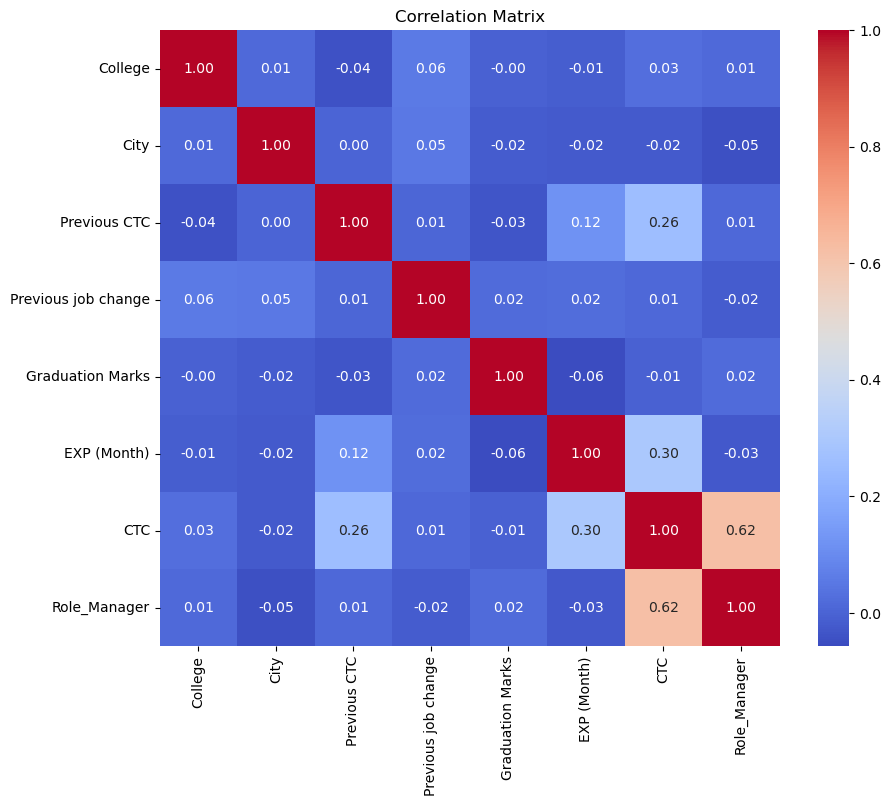

In [206]:
# Visual representation of corr
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [207]:
input_data = df.loc[:, df.columns != 'CTC']
output_data = df['CTC']

In [208]:
input_data

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523,3,66,19,1
1,2,0,57081,1,84,18,0
2,1,0,60347,2,52,28,0
3,1,0,49010,2,81,33,0
4,3,0,57879,4,74,32,0
...,...,...,...,...,...,...,...
1584,3,1,61285,3,44,60,0
1585,3,0,63140,1,44,24,0
1586,3,1,44907,1,60,19,0
1587,3,0,52054,2,67,29,0


In [209]:
output_data

0       71406
1       68005
2       76764
3       82092
4       73878
        ...  
1584    77283
1585    68416
1586    70186
1587    73394
1588    70056
Name: CTC, Length: 1589, dtype: int32

# Feature scalling the data

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)


In [212]:
input_data


,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,-0.029286,-1.028732,0.000683,0.419527,0.411558,-1.421162,1.960743
1,-0.029286,-1.028732,0.234859,-1.360523,1.617149,-1.492061,-0.510011
2,-1.222509,-1.028732,0.725756,-0.470498,-0.526124,-0.783065,-0.510011
3,-1.222509,-1.028732,-0.978255,-0.470498,1.416217,-0.428566,-0.510011
4,1.163937,-1.028732,0.354803,1.309552,0.947376,-0.499466,-0.510011
...,...,...,...,...,...,...,...
1584,1.163937,0.972070,0.866743,0.419527,-1.061942,1.485725,-0.510011
1585,1.163937,-1.028732,1.145559,-1.360523,-1.061942,-1.066663,-0.510011
1586,1.163937,0.972070,-1.594958,-1.360523,0.009695,-1.421162,-0.510011
1587,1.163937,-1.028732,-0.520726,-0.470498,0.478536,-0.712165,-0.510011


# Training data

## here i am using 20% of data for testing.

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train,x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.20,random_state=42)

# Ans for Q.3 :- The Available options of ML Algorithms

## Here we need to predict the Salary of the employee which is continues value so we have to use regression algorithms.

### I have used several algorithms to find which model is best fit for my dataset. and to determine accuracy i am also 
### calcualting the R2,MAE & MSE

## Regression Models i chose :- 
###        1. Linear Regression
###        2. Lasso
 ###       3. Ridge
 ###       4. Decision Tree Regressor
###        5. KNN
###        6. Random Forest
###        7. Gradient Boosting Regressor
###        8. XG-Boost
 ###       9. Grid Search CV

In [215]:
#importing all possible regression models
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Linear Regression

In [216]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)

lr_R2 = (r2_score(y_test, lr_pred))
lr_r2_train = r2_score(y_train, lr_pred_train)

lr_MAE_test =  mean_absolute_error(y_test, lr_pred)
lr_MAE_train =  mean_absolute_error(y_train, lr_pred_train)

lr_MSE_test = mean_squared_error(y_test, lr_pred)
lr_MSE_train = mean_squared_error(y_train, lr_pred_train)
print("Linear Regression :")
print("r2_score (Train) :", lr_r2_train)
print("MAE (Train):", lr_MAE_train)
print("MSE (Train):", lr_MSE_train)
print("")
print("r2_score (TEST):",lr_R2)
print("MAE (TEST):", lr_MAE_test)
print("MSE (TEST):", lr_MSE_test)      

print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)


Linear Regression :
r2_score (Train) : 0.5137734046204612
MAE (Train): 6722.502766030005
MSE (Train): 73096551.52229236

r2_score (TEST): 0.5933515097281485
MAE (TEST): 7191.2437276750225
MSE (TEST): 77362921.92796254
Coef: [ 433.70450214  241.31315587 2809.21844394    9.81507575   28.97538923
 3437.52651511 7528.90190197]
Intercept: 75391.25102252504


### Lasso

In [248]:
ls = Lasso(alpha=1)
ls.fit(x_train,y_train)
ls_pred = ls.predict(x_test)
ls_pred_train = ls.predict(x_train)

ls_R2 = (r2_score(y_test, ls_pred))
ls_r2_train = r2_score(y_train, lr_pred_train)

ls_MAE_test =  mean_absolute_error(y_test, ls_pred)
ls_MAE_train =  mean_absolute_error(y_train, ls_pred_train)

ls_MSE_test = mean_squared_error(y_test, ls_pred)
ls_MSE_train = mean_squared_error(y_train, ls_pred_train)

print("Results :")
print("r2_score (Train) :", ls_r2_train)
print("MAE (Train):", ls_MAE_train)
print("MSE (Train):", ls_MSE_train)
print("")
print("r2_score (TEST):",ls_R2)
print("MAE (TEST):", ls_MAE_test)
print("MSE (TEST):", ls_MSE_test) 

print("Coef:",ls.coef_)
print("Intercept:",ls.intercept_)



Results :
r2_score (Train) : 0.5137734046204612
MAE (Train): 6722.4933879901055
MSE (Train): 73096558.55355996

r2_score (TEST): 0.5933166424401441
MAE (TEST): 7191.573701889947
MSE (TEST): 77369555.2620195
Coef: [ 432.69282749  240.27270042 2808.28914123    8.92355186   27.90765002
 3436.5464592  7527.79122383]
Intercept: 75391.2402952226


### Ridge 

In [247]:
Rg = Ridge(alpha=1)
Rg.fit(x_train,y_train)
Rg_pred = Rg.predict(x_test)
Rg_pred_train = Rg.predict(x_train)

Rg_R2 = (r2_score(y_test, Rg_pred))
Rg_r2_train = r2_score(y_train, Rg_pred_train)

Rg_MAE_test =  mean_absolute_error(y_test, Rg_pred)
Rg_MAE_train =  mean_absolute_error(y_train, Rg_pred_train)

Rg_MSE_test = mean_squared_error(y_test, Rg_pred)
Rg_MSE_train = mean_squared_error(y_train, Rg_pred_train)

print("Results :")
print("r2_score (Train) :", Rg_r2_train)
print("MAE (Train):", Rg_MAE_train)
print("MSE (Train):", Rg_MSE_train)
print("")
print("r2_score (TEST):",Rg_R2)
print("MAE (TEST):", Rg_MAE_test)
print("MSE (TEST):", Rg_MSE_test) 
print("Coef:",Rg.coef_)
print("Intercept:",Rg.intercept_)


Results :
r2_score (Train) : 0.5137730890698726
MAE (Train): 6722.623848187841
MSE (Train): 73096598.96038002

r2_score (TEST): 0.5932136688005096
MAE (TEST): 7192.627657818951
MSE (TEST): 77389145.5023235
Coef: [ 433.18604627  240.69586248 2807.38421279    9.68806815   28.90918439
 3434.94170241 7522.80185765]
Intercept: 75391.17123288056


### ElasticNet

In [246]:
El = ElasticNet(alpha=5)
El.fit(x_train,y_train)
El_pred = El.predict(x_test)
El_pred_train = El.predict(x_train)

El_R2 = (r2_score(y_test, El_pred))
El_r2_train = r2_score(y_train, El_pred_train)

El_MAE_test =  mean_absolute_error(y_test, El_pred)
El_MAE_train =  mean_absolute_error(y_train, El_pred_train)

El_MSE_test = mean_squared_error(y_test, El_pred)
El_MSE_train = mean_squared_error(y_train, El_pred_train)
print("Results :")
print("r2_score (Train) :", El_r2_train)
print("MAE (Train):", El_MAE_train)
print("MSE (Train):", El_MSE_train)
print("")
print("r2_score (TEST):",El_R2)
print("MAE (TEST):", El_MAE_test)
print("MSE (TEST):", El_MSE_test)  
print("Coef:",El.coef_)
print("Intercept:",El.intercept_)


Results :
r2_score (Train) : 0.25352276664954587
MAE (Train): 8010.873228641949
MSE (Train): 112221157.92581736

r2_score (TEST): 0.2546620015559614
MAE (TEST): 9303.165389228277
MSE (TEST): 141796973.9541448
Coef: [  70.96238228  -41.77160271  902.92328926  -33.32033458   -3.22590782
 1025.42137579 2109.75226948]
Intercept: 75316.06837342706


### DecisionTreeRegressor

In [245]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(x_train,y_train)
DT_pred = DT.predict(x_test)
DT_pred_train = DT.predict(x_train)

DT_R2 = (r2_score(y_test, DT_pred))
DT_r2_train = r2_score(y_train, DT_pred_train)

DT_MAE_test =  mean_absolute_error(y_test, DT_pred)
DT_MAE_train =  mean_absolute_error(y_train, DT_pred_train)

DT_MSE_test = mean_squared_error(y_test, DT_pred)
DT_MSE_train = mean_squared_error(y_train, DT_pred_train)
print("Results :")
print("r2_score (Train) :", DT_r2_train)
print("MAE (Train):", DT_MAE_train)
print("MSE (Train):", DT_MSE_train)
print("")
print("r2_score (TEST):",DT_R2)
print("MAE (TEST):", DT_MAE_test)
print("MSE (TEST):", DT_MSE_test) 



Results :
r2_score (Train) : 0.6623644305533087
MAE (Train): 5586.937609239464
MSE (Train): 50758218.55971056

r2_score (TEST): 0.5828604610642147
MAE (TEST): 6894.158234676221
MSE (TEST): 79358793.54225968


# now Training score is best. But it is over fitting. 
# we may eliminate this overfitting using Post Prunning technic.

### RandomForest

In [242]:
RF = RandomForestRegressor(n_estimators=150)
RF.fit(x_train,y_train)
RF_pred = RF.predict(x_test)
RF_pred_train = RF.predict(x_train)

RF_R2 = (r2_score(y_test, RF_pred))
RF_r2_train = r2_score(y_train, RF_pred_train)

RF_MAE_test =  mean_absolute_error(y_test, RF_pred)
RF_MAE_train =  mean_absolute_error(y_train, RF_pred_train)

RF_MSE_test = mean_squared_error(y_test, RF_pred)
RF_MSE_train = mean_squared_error(y_train, RF_pred_train)
print("Results :")
print("r2_score (Train) :", RF_r2_train)
print("MAE (Train):", RF_MAE_train)
print("MSE (Train):", RF_MSE_train)
print("")
print("r2_score (TEST):",RF_R2)
print("MAE (TEST):", RF_MAE_test)
print("MSE (TEST):", RF_MSE_test)


Results :
r2_score (Train) : 0.9488280479816423
MAE (Train): 2120.404710201941
MSE (Train): 7692901.340138334

r2_score (TEST): 0.6312131449500887
MAE (TEST): 6431.93320754717
MSE (TEST): 70159927.69630608


### Gradient Boosting Regressor

In [243]:
GB = GradientBoostingRegressor(max_depth=4)
GB.fit(x_train,y_train)
GB_pred = GB.predict(x_test)
GB_pred_train = GB.predict(x_train)

GB_R2 = (r2_score(y_test, GB_pred))
GB_r2_train = r2_score(y_train, GB_pred_train)

GB_MAE_test =  mean_absolute_error(y_test, GB_pred)
GB_MAE_train =  mean_absolute_error(y_train, GB_pred_train)

GB_MSE_test = mean_squared_error(y_test, GB_pred)
GB_MSE_train = mean_squared_error(y_train, GB_pred_train)
print("Results :")
print("r2_score (Train) :", GB_r2_train)
print("MAE (Train):", GB_MAE_train)
print("MSE (Train):", GB_MSE_train)
print("")
print("r2_score (TEST):",GB_R2)
print("MAE (TEST):", GB_MAE_test)
print("MSE (TEST):", GB_MSE_test)


Results :
r2_score (Train) : 0.7934861385750831
MAE (Train): 4389.015793825663
MSE (Train): 31046123.875496313

r2_score (TEST): 0.623405094322341
MAE (TEST): 6549.231271737392
MSE (TEST): 71645371.82206738


### XG-Boost Regressor 

In [244]:
XGB = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Fit the model
XGB.fit(x_train,y_train)
XGB_pred = XGB.predict(x_test)
XGB_pred_train = XGB.predict(x_train)

XGB_R2 = (r2_score(y_test, XGB_pred))
XGB_r2_train = r2_score(y_train, XGB_pred_train)

XGB_MAE_test =  mean_absolute_error(y_test, XGB_pred)
XGB_MAE_train =  mean_absolute_error(y_train, XGB_pred_train)

XGB_MSE_test = mean_squared_error(y_test, XGB_pred)
XGB_MSE_train = mean_squared_error(y_train, XGB_pred_train)
print("Results :")
print("r2_score (Train) :", XGB_r2_train)
print("MAE (Train):", XGB_MAE_train)
print("MSE (Train):", XGB_MSE_train)
print("")
print("r2_score (TEST):",XGB_R2)
print("MAE (TEST):", XGB_MAE_test)
print("MSE (TEST):", XGB_MSE_test)


Results :
r2_score (Train) : 0.9880734323510023
MAE (Train): 899.4892985346185
MSE (Train): 1792972.60767598

r2_score (TEST): 0.6494026000222659
MAE (TEST): 6229.151668140723
MSE (TEST): 66699471.24232958


### Grid Search CV

In [224]:
#Define the parameter grid for max_depth
param_grid = {'max_depth': [3, 5, 7, 10, None]}

#Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')

#Fit GridSearchCV
grid_search_dt.fit(x_train, y_train)

#Get the best parameters and best score
best_params_BT = grid_search_dt.best_params_
best_score_BT = grid_search_dt.best_score_

#Train the best model
best_decision_tree = DecisionTreeRegressor(**best_params_BT, random_state=42)
best_decision_tree.fit(x_train, y_train)

#Make predictions
best_dt_pred = best_decision_tree.predict(x_test)

#Evaluate the model
best_dt_mse = mean_squared_error(y_test, best_dt_pred)
best_dt_r2 = r2_score(y_test, best_dt_pred)

print("Tuned Decision Tree Regression Results:")
print("Best Parameters:", best_params_BT)
print("Best R-squared Score (CV):", best_score_BT)
print("Mean Squared Error:", best_dt_mse)
print("R-squared (Test Set):", best_dt_r2)
print("R-squared (Training Set):", best_decision_tree.score(x_train, y_train))

Tuned Decision Tree Regression Results:
Best Parameters: {'max_depth': 3}
Best R-squared Score (CV): 0.5764120974591482
Mean Squared Error: 77065777.29092808
R-squared (Test Set): 0.5949134132218526
R-squared (Training Set): 0.6062943355764511


### KNN 

In [225]:
KNN = KNeighborsRegressor(n_neighbors=9)
KNN.fit(x_train,y_train)
KNN_pred = KNN.predict(x_test)
KNN_pred_train = KNN.predict(x_train)

KNN_R2 = (r2_score(y_test, KNN_pred))
KNN_r2_train = r2_score(y_train, KNN_pred_train)

KNN_MAE_test =  mean_absolute_error(y_test, KNN_pred)
KNN_MAE_train =  mean_absolute_error(y_train, KNN_pred_train)

KNN_MSE_test = mean_squared_error(y_test, KNN_pred)
KNN_MSE_train = mean_squared_error(y_train, KNN_pred_train)
print("Linear Regression :")
print("r2_score (Train) :", KNN_r2_train)
print("MAE (Train):", KNN_MAE_train)
print("MSE (Train):", KNN_MSE_train)
print("")
print("r2_score (TEST):",KNN_R2)
print("MAE (TEST):", KNN_MAE_test)
print("MSE (TEST):", KNN_MSE_test)


Linear Regression :
r2_score (Train) : 0.6320137140445136
MAE (Train): 5860.805577410612
MSE (Train): 55320973.32077396

r2_score (TEST): 0.6160672592877579
MAE (TEST): 6965.929769392033
MSE (TEST): 73041359.68992157


### Visual Representation 

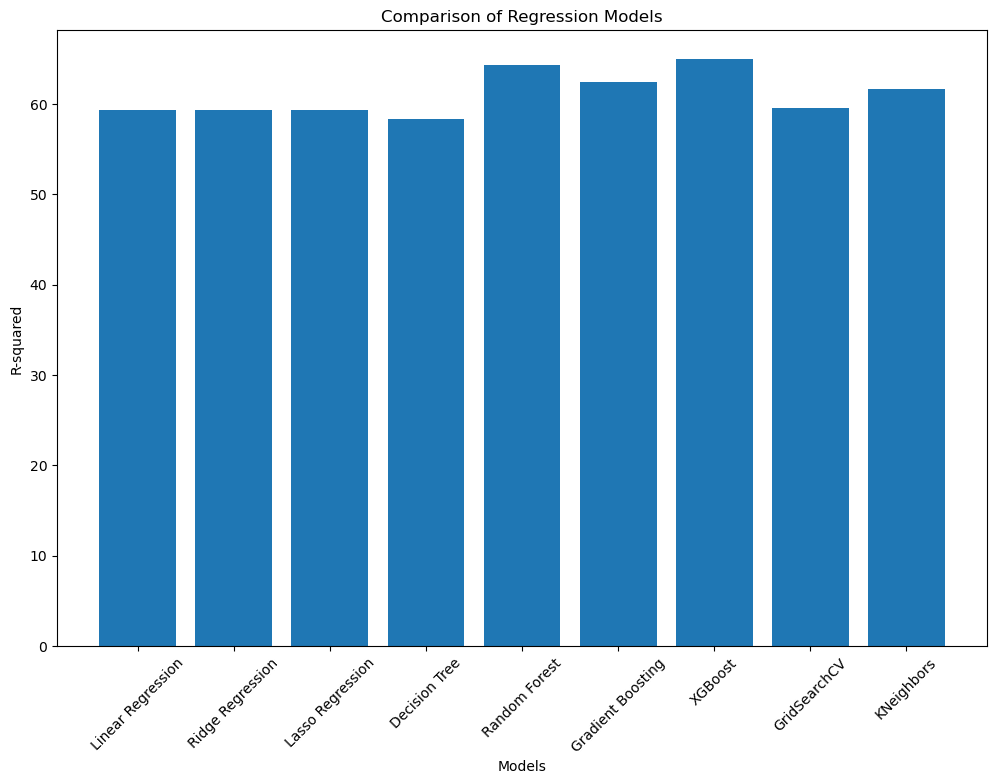

In [226]:
import matplotlib.pyplot as plt

#Create a list of model names
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost','GridSearchCV','KNeighbors']

#Create a list of R-squared values for each model
r2_values = [lr_R2*100, Rg_R2*100, ls_R2*100, DT_R2*100, RF_R2*100, GB_R2*100, XGB_R2*100, best_dt_r2*100, KNN_R2*100]

#Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(model_names, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

## Now we are Using 10% Data of size for testing

In [227]:
#training Data again with 90% of data
X_train,X_test, Y_train, Y_test = train_test_split(input_data,output_data,test_size=0.10,random_state=42)

In [228]:
#importing all possible regression models
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Linear Regression¶

In [229]:
LRA = LinearRegression()
LRA.fit(x_train,y_train)
LRA_pred = LRA.predict(x_test)
LRA_pred_train = LRA.predict(x_train)

LRA_R2 = (r2_score(y_test, LRA_pred))
LRA_r2_train = r2_score(y_train, LRA_pred_train)

LRA_MAE_test =  mean_absolute_error(y_test, LRA_pred)
LRA_MAE_train =  mean_absolute_error(y_train, LRA_pred_train)

LRA_MSE_test = mean_squared_error(y_test, LRA_pred)
LRA_MSE_train = mean_squared_error(y_train, LRA_pred_train)
print("Linear Regression :")
print("r2_score (Train) :", LRA_r2_train)
print("MAE (Train):", LRA_MAE_train)
print("MSE (Train):", LRA_MSE_train)
print("")
print("r2_score (TEST):",LRA_R2)
print("MAE (TEST):", LRA_MAE_test)
print("MSE (TEST):", LRA_MSE_test)
print("Coef:",lrA.coef_)
print("Intercept:",lrA.intercept_)


Linear Regression :
r2_score (Train) : 0.5137734046204612
MAE (Train): 6722.502766030005
MSE (Train): 73096551.52229236

r2_score (TEST): 0.5933515097281485
MAE (TEST): 7191.2437276750225
MSE (TEST): 77362921.92796254
Coef: [ 371.1907837   262.78555097 2715.87050403  103.68526779   34.57208034
 3548.94009957 7662.02115719]
Intercept: 75347.40785645328


### Ridge

In [262]:
RG_1 = Ridge(alpha=1)
RG_1.fit(x_train,y_train)
RG_1_pred = RG_1.predict(x_test)
RG_1_pred_train = RG_1.predict(x_train)

RG_1_R2 = (r2_score(y_test, RG_1_pred))
RG_1_r2_train = r2_score(y_train, RG_1_pred_train)

RG_1_MAE_test =  mean_absolute_error(y_test, RG_1_pred)
RG_1_MAE_train =  mean_absolute_error(y_train, RG_1_pred_train)

RG_1_MSE_test = mean_squared_error(y_test, RG_1_pred)
RG_1_MSE_train = mean_squared_error(y_train, RG_1_pred_train)
print("Results :")
print("r2_score (Train) :", RG_1_r2_train)
print("MAE (Train):", RG_1_MAE_train)
print("MSE (Train):", RG_1_MSE_train)
print("")
print("r2_score (TEST):",RG_1_R2)
print("MAE (TEST):", RG_1_MAE_test)
print("MSE (TEST):", RG_1_MSE_test)
print("Coef:",RG_1.coef_)
print("Intercept:",RG_1.intercept_)


Results :
r2_score (Train) : 0.5137730890698726
MAE (Train): 6722.623848187841
MSE (Train): 73096598.96038002

r2_score (TEST): 0.5932136688005096
MAE (TEST): 7192.627657818951
MSE (TEST): 77389145.5023235
Coef: [ 433.18604627  240.69586248 2807.38421279    9.68806815   28.90918439
 3434.94170241 7522.80185765]
Intercept: 75391.17123288056


### Lasso

In [263]:
LS_1 = Lasso(alpha=1)
LS_1.fit(x_train,y_train)
LS_1_pred = LS_1.predict(x_test)
LS_1_pred_train = LS_1.predict(x_train)

LS_1_R2 = (r2_score(y_test, LS_1_pred))
LS_1_r2_train = r2_score(y_train, LS_1_pred_train)

LS_1_MAE_test =  mean_absolute_error(y_test, LS_1_pred)
LS_1_MAE_train =  mean_absolute_error(y_train, LS_1_pred_train)

LS_1_MSE_test = mean_squared_error(y_test, LS_1_pred)
LS_1_MSE_train = mean_squared_error(y_train, LS_1_pred_train)
print("Results :")
print("r2_score (Train) :", LS_1_r2_train)
print("MAE (Train):", LS_1_MAE_train)
print("MSE (Train):", LS_1_MSE_train)
print("")
print("r2_score (TEST):",LS_1_R2)
print("MAE (TEST):", LS_1_MAE_test)
print("MSE (TEST):", LS_1_MSE_test)
print("Coef:",LS_1.coef_)
print("Intercept:",LS_1.intercept_)


Results :
r2_score (Train) : 0.5137733578495912
MAE (Train): 6722.4933879901055
MSE (Train): 73096558.55355996

r2_score (TEST): 0.5933166424401441
MAE (TEST): 7191.573701889947
MSE (TEST): 77369555.2620195
Coef: [ 432.69282749  240.27270042 2808.28914123    8.92355186   27.90765002
 3436.5464592  7527.79122383]
Intercept: 75391.2402952226


### ElasticNet

In [261]:
EL_1 = ElasticNet(alpha=5)
EL_1.fit(x_train,y_train)
EL_1_pred = EL_1.predict(x_test)
EL_1_pred_train = EL_1.predict(x_train)

EL_1_R2 = (r2_score(y_test, EL_1_pred))
EL_1_r2_train = r2_score(y_train, EL_1_pred_train)

EL_1_MAE_test =  mean_absolute_error(y_test, EL_1_pred)
EL_1_MAE_train =  mean_absolute_error(y_train, EL_1_pred_train)

EL_1_MSE_test = mean_squared_error(y_test, EL_1_pred)
EL_1_MSE_train = mean_squared_error(y_train, EL_1_pred_train)
print("Results :")
print("r2_score (Train) :", EL_1_r2_train)
print("MAE (Train):", EL_1_MAE_train)
print("MSE (Train):", EL_1_MSE_train)
print("")
print("r2_score (TEST):",EL_1_R2)
print("MAE (TEST):", EL_1_MAE_test)
print("MSE (TEST):", EL_1_MSE_test)
print("Coef:",EL_1.coef_)
print("Intercept:",EL_1.intercept_)


Results :
r2_score (Train) : 0.25352276664954587
MAE (Train): 8010.873228641949
MSE (Train): 112221157.92581736

r2_score (TEST): 0.2546620015559614
MAE (TEST): 9303.165389228277
MSE (TEST): 141796973.9541448
Coef: [  70.96238228  -41.77160271  902.92328926  -33.32033458   -3.22590782
 1025.42137579 2109.75226948]
Intercept: 75316.06837342706


### Decision Tree Regressor

In [233]:
DT1 = DecisionTreeRegressor(max_depth=5)
DT1.fit(x_train,y_train)
DT1_pred = DT1.predict(x_test)
DT1_pred_train = DT1.predict(x_train)

DT1_R2 = (r2_score(y_test, DT1_pred))
DT1_r2_train = r2_score(y_train, DT1_pred_train)

DT1_MAE_test =  mean_absolute_error(y_test, DT1_pred)
DT1_MAE_train =  mean_absolute_error(y_train, DT1_pred_train)

DT1_MSE_test = mean_squared_error(y_test, DT1_pred)
DT1_MSE_train = mean_squared_error(y_train, DT1_pred_train)
print("Results :")
print("r2_score (Train) :", DT1_r2_train)
print("MAE (Train):", DT1_MAE_train)
print("MSE (Train):", DT1_MSE_train)
print("")
print("r2_score (TEST):",DT1_R2)
print("MAE (TEST):", DT1_MAE_test)
print("MSE (TEST):", DT1_MSE_test)



Results :
r2_score (Train) : 0.6623644305533087
MAE (Train): 5586.937609239464
MSE (Train): 50758218.55971056

r2_score (TEST): 0.5828604610642147
MAE (TEST): 6894.158234676221
MSE (TEST): 79358793.54225968


### Random Forest

In [240]:
RF1 = RandomForestRegressor(n_estimators=29)
RF1.fit(x_train,y_train)
RF1_pred = RF1.predict(x_test)
RF1_pred_train = RF1.predict(x_train)

RF1_R2 = (r2_score(y_test, RF1_pred))
RF1_r2_train = r2_score(y_train, RF1_pred_train)

RF1_MAE_test =  mean_absolute_error(y_test, RF1_pred)
RF1_MAE_train =  mean_absolute_error(y_train, RF1_pred_train)

RF1_MSE_test = mean_squared_error(y_test, RF1_pred)
RF1_MSE_train = mean_squared_error(y_train, RF1_pred_train)
print("Results :")
print("r2_score (Train) :", RF1_r2_train)
print("MAE (Train):", RF1_MAE_train)
print("MSE (Train):", RF1_MSE_train)
print("")
print("r2_score (TEST):",RF1_R2)
print("MAE (TEST):", RF1_MAE_test)
print("MSE (TEST):", RF1_MSE_test)


Results :
r2_score (Train) : 0.9497180064454885
MAE (Train): 2111.5245161290322
MSE (Train): 7559110.02694524

r2_score (TEST): 0.6363416258957195
MAE (TEST): 6322.364245283019
MSE (TEST): 69184258.83118711


# now Training score is best. But it is over fitting. 
# we wiill eliminate this overfitting using Post Prunning technic.


### Gradient Boosting Regrassor

In [235]:
GB1 = GradientBoostingRegressor()
GB1.fit(x_train,y_train)
GB1_pred = GB1.predict(x_test)
GB1_pred_train = GB1.predict(x_train)

GB1_R2 = (r2_score(y_test, GB1_pred))
GB1_r2_train = r2_score(y_train, GB1_pred_train)

GB1_MAE_test =  mean_absolute_error(y_test, GB1_pred)
GB1_MAE_train =  mean_absolute_error(y_train, GB1_pred_train)

GB1_MSE_test = mean_squared_error(y_test, GB1_pred)
GB1_MSE_train = mean_squared_error(y_train, GB1_pred_train)
print("Results :")
print("r2_score (Train) :", GB1_r2_train)
print("MAE (Train):", GB1_MAE_train)
print("MSE (Train):", GB1_MSE_train)
print("")
print("r2_score (TEST):",GB1_R2)
print("MAE (TEST):", GB1_MAE_test)
print("MSE (TEST):", GB1_MSE_test)


Results :
r2_score (Train) : 0.7154142054321622
MAE (Train): 5123.667937239189
MSE (Train): 42783015.969956666

r2_score (TEST): 0.616970151884693
MAE (TEST): 6638.244534379012
MSE (TEST): 72869588.710422


### XG- Boost Regressor

In [236]:
XGB1 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Fit the model
XGB1.fit(x_train,y_train)
XGB1_pred = XGB1.predict(x_test)
XGB1_pred_train = XGB1.predict(x_train)

XGB1_R2 = (r2_score(y_test, XGB1_pred))
XGB1_r2_train = r2_score(y_train, XGB1_pred_train)

XGB1_MAE_test =  mean_absolute_error(y_test, XGB1_pred)
XGB1_MAE_train =  mean_absolute_error(y_train, XGB1_pred_train)

XGB1_MSE_test = mean_squared_error(y_test, XGB1_pred)
XGB1_MSE_train = mean_squared_error(y_train, XGB1_pred_train)
print("Results :")
print("r2_score (Train) :", XGB1_r2_train)
print("MAE (Train):", XGB1_MAE_train)
print("MSE (Train):", XGB1_MSE_train)
print("")
print("r2_score (TEST):",XGB1_R2)
print("MAE (TEST):", XGB1_MAE_test)
print("MSE (TEST):", XGB1_MSE_test)


Results :
r2_score (Train) : 0.9880734323510023
MAE (Train): 899.4892985346185
MSE (Train): 1792972.60767598

r2_score (TEST): 0.6494026000222659
MAE (TEST): 6229.151668140723
MSE (TEST): 66699471.24232958


### Grid Search CV


In [237]:
#Define the parameter grid for max_depth
param_grid = {'max_depth': [3, 5, 7, 10, None]}

#Initialize GridSearchCV
GRID_SEARCH_DT1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')

#Fit GridSearchCV
GRID_SEARCH_DT1 .fit(x_train,y_train)
GRID_SEARCH_DT1_pred = GRID_SEARCH_DT1 .predict(x_test)
GRID_SEARCH_DT1_pred_train = GRID_SEARCH_DT1 .predict(x_train)

GRID_SEARCH_DT1_R2 = (r2_score(y_test, GRID_SEARCH_DT1_pred))
GRID_SEARCH_DT1_r2_train = r2_score(y_train, GRID_SEARCH_DT1_pred_train)

GRID_SEARCH_DT1_MAE_test =  mean_absolute_error(y_test, GRID_SEARCH_DT1_pred)
GRID_SEARCH_DT1_MAE_train =  mean_absolute_error(y_train, GRID_SEARCH_DT1_pred_train)

GRID_SEARCH_DT1_MSE_test = mean_squared_error(y_test, GRID_SEARCH_DT1_pred)
GRID_SEARCH_DT1_MSE_train = mean_squared_error(y_train, GRID_SEARCH_DT1_pred_train)
print("Results :")
print("r2_score (Train) :", GRID_SEARCH_DT1_r2_train)
print("MAE (Train):", GRID_SEARCH_DT1_MAE_train)
print("MSE (Train):", GRID_SEARCH_DT1_MSE_train)
print("")
print("r2_score (TEST):",GRID_SEARCH_DT1_R2)
print("MAE (TEST):", GRID_SEARCH_DT1_MAE_test)
print("MSE (TEST):", GRID_SEARCH_DT1_MSE_test)


Results :
r2_score (Train) : 0.6062943355764511
MAE (Train): 6019.499422414139
MSE (Train): 59187478.960689805

r2_score (TEST): 0.5949134132218526
MAE (TEST): 6855.812444351174
MSE (TEST): 77065777.29092808


### KNN

In [238]:
KNN1 = KNeighborsRegressor(n_neighbors=7)
KNN1.fit(x_train,y_train)
KNN1_pred = KNN1.predict(x_test)
KNN1_pred_train = KNN1.predict(x_train)

KNN1_R2 = (r2_score(y_test, KNN1_pred))
KNN1_r2_train = r2_score(y_train, KNN1_pred_train)

KNN1_MAE_test =  mean_absolute_error(y_test, KNN1_pred)
KNN1_MAE_train =  mean_absolute_error(y_train, KNN1_pred_train)

KNN1_MSE_test = mean_squared_error(y_test, KNN1_pred)
KNN1_MSE_train = mean_squared_error(y_train, KNN1_pred_train)
print("Results :")
print("r2_score (Train) :", KNN1_r2_train)
print("MAE (Train):", KNN1_MAE_train)
print("MSE (Train):", KNN1_MSE_train)
print("")
print("r2_score (TEST):",KNN1_R2)
print("MAE (TEST):", KNN1_MAE_test)
print("MSE (TEST):", KNN1_MSE_test)


Results :
r2_score (Train) : 0.6437271069333492
MAE (Train): 5737.57603686636
MSE (Train): 53560048.19875078

r2_score (TEST): 0.6050524251723217
MAE (TEST): 7019.897574123989
MSE (TEST): 75136878.97035041


## Visual Representation of the all the model's accuracy R2 with training of 90% data of dataset.

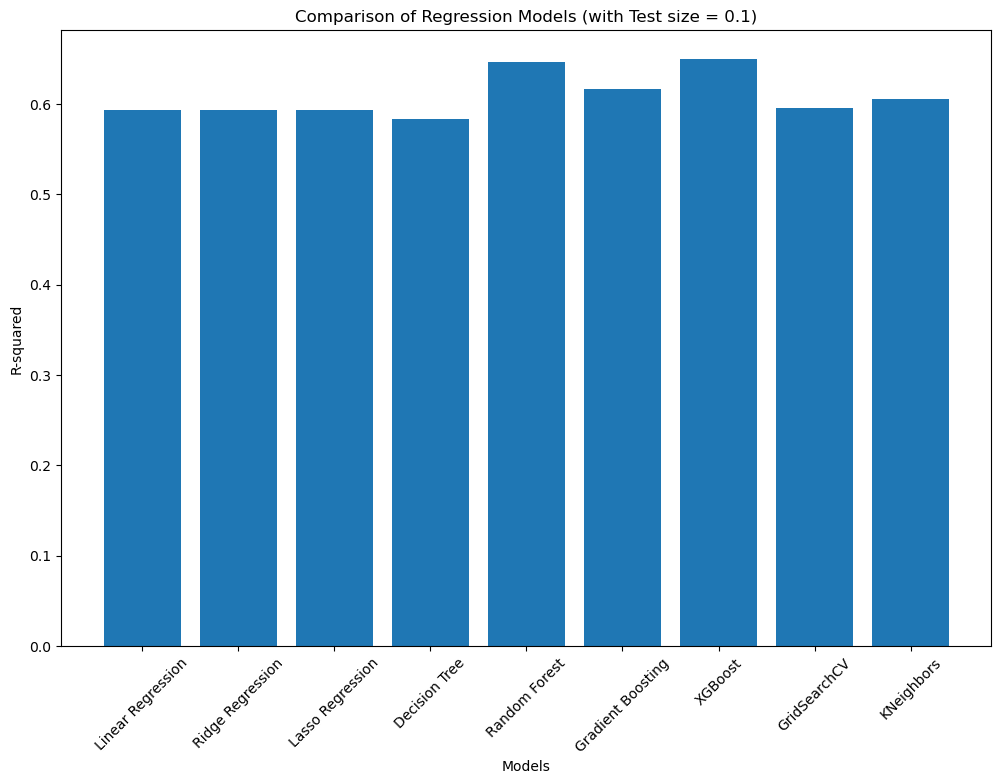

In [239]:
import matplotlib.pyplot as plt

#Create a list of model names
model_names2 = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost','GridSearchCV','KNeighbors']

#Create a list of R-squared values for each model
r2_values2 = [LRA_R2, RG_1_R2, LS_1_R2, DT1_R2, RF1_R2, GB1_R2, XGB1_R2, GRID_SEARCH_DT1_R2, KNN1_R2]

#Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(model_names2, r2_values2)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of Regression Models (with Test size = 0.1)')
plt.xticks(rotation=45)
plt.show()

### To compare the performance of different machine learning models, we'll focus on the R-squared (r2_score) metric, which measures the goodness of fit of the models. A higher R-squared indicates a better fit to the data. Additionally, we'll consider Mean Absolute Error (MAE) and Mean Squared Error (MSE) for reference.s:

## Here is a summary of the model performance in the 2 scenarios:

## 1st Scenario - Featured scaled data and Test Data size = 0.2

    Linear Regression =  59.33515097281485
    Lasso Regression =  59.33166424401441
    Ridge Regression =  63.61715916387061
    Decision Tree =  58.28604610642147
    Random Forest =  63.68581759785632
    Gradient Boosting =  61.70409468947199
    XG - Boost  =  64.30266389902687
    Grid Search CV  =  59.491341322185264
    KNN  =  56.20747120438985



## 2nd Scenario - Featured scaled data and Test Data size = 0.1

    Linear Regression  =  63.63230307340062
    Lasso Regression  =  63.62811813300671
    Ridge Regression  =  63.61715916387061
    Decision Tree  =  62.71767830775723
    Random Forest  =  68.36594562984222
    Gradient Boosting  =  67.6649218683902
    XG - Boost  =  64.30266389902687
    Grid Search CV  =  63.007313041950596
    KNN  =  63.66460502484027

# Ans for Q.4 : - 

## The Gradient Boosting Regressor And decision Tree after post-prunning is best choice after comparing all the other factors.
## Each tree is trained sequentially, with each new tree aiming to correct the errors of the previous ones.
## The algorithm minimizes a specified loss function through gradient descent, which helps in refining the predictions iteratively.
## Gradient Boosting can include regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization, which help prevent overfitting and improve generalization.
## it supports hypertunning parameter to increase accuracy.

# Ans For Q.5 :-
## To enhance the performance of the selected model:

## Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find optimal parameters.
## Feature Engineering: Create new features or interactions between existing features based on domain knowledge.
## Cross-Validation: Implement k-fold cross-validation to ensure model robustness.
## Ensemble Methods: Combine predictions from multiple models for better accuracy.
## More Data: If possible, increase the size of the training dataset to improve generalization.